In [19]:
import numpy as np
from scipy import optimize
import scipy.optimize as opt
from scipy.optimize import minimize
import sympy as sp
import matplotlib.pyplot as plt
import sympy as sp
from ipywidgets import interact, FloatSlider




# The Solow Model
The Solow Model is a cornerstone macroeconomic framework that analyzes the determinants of long-term economic growth. This model focuses on how different factors such as capital accumulation, labor force characteristics, and technological advancements contribute to the output of an economy.

## Assumptions of the Solow Model

The model simplifies the complexity of real economies by making several key assumptions:

- **Single Representative Firm**: The economy consists of a single, representative firm.
- **Fixed Labor Force**: The total number of workers (labor force) is constant.
- **Constant Returns to Scale**: The production function is homogeneous of degree one, implying that scaling all inputs by a constant factor results in output scaling by the same factor.
- **Diminishing Returns to Capital**: As capital stock increases while other factors remain fixed, each additional unit of capital produces less additional output.
- **Closed Economy**: The economy does not engage in trade, meaning there are no imports or exports.

## Key Variables and Parameters

- $ Y $ = Output, commonly referred to as Gross Domestic Product (GDP).
- $ K $ = Capital stock, the total accumulation of produced means of production.
- $ L $ = Labor force, the total number of workers available for production.
- $ A $ = Technological progress, also known as total factor productivity (TFP).
- $ s $ = Savings rate, defined as the proportion of output that is saved and reinvested.
- $ \delta $ = Depreciation rate, the rate at which capital stock depreciates.
- $ n $ = Growth rate of the labor force.
- $ \alpha $ (alpha) = Output elasticity of capital, representing capital's contribution to output.
- $ 1 - \alpha $ = Output elasticity of labor, representing labor's contribution to output.

## Mathematical Representation of the Production Function

The production function can be expressed as:

$$
Y = A K^\alpha L^{1-\alpha}
$$

This function shows how output (Y) is determined by the levels of capital (K), labor (L), and technological progress (A). The parameters \(\alpha\) and \(1 - \alpha\) represent the output elasticities of capital and labor, respectively, indicating how sensitive output is to changes in each input.

## Dynamic Equations of the Model

The model's dynamics are driven by the equations of capital accumulation and technological growth:

### Capital Accumulation

$$
\frac{dK}{dt} = sY - \delta K
$$

This differential equation describes how the capital stock evolves over time, where $sY$ is the total investment from saving a fraction $s$ of output, and $\delta K$ is the loss of capital due to depreciation.

### Technological Progress

Assuming exogenous technological progress, the growth rate of technology ($g$) is constant:

$$
\frac{dA}{dt} = gA
$$

The model can be further analyzed to derive steady-state solutions and to explore the impact of changes in parameters like the savings rate, depreciation rate, and technology growth rate on the long-term economic growth of the economy.


In [35]:
# Define symbols more descriptively
Capital, Output, Labor, Technology = sp.symbols('K Q L A')
SavingsRate, DepreciationRate, LaborGrowthRate, TechGrowthRate, OutputElasticity = sp.symbols('s delta n g alpha')

# Production Function
production_function = Technology * Capital**OutputElasticity * Labor**(1 - OutputElasticity)

# Capital Accumulation
capital_accumulation = SavingsRate * Output + Capital * (1 - DepreciationRate)

# Output and Capital per Capita
output_per_capita = Output / Labor
capital_per_capita = Capital / Labor

# Output per Capita Growth
output_per_capita_growth = (1 - LaborGrowthRate) * (SavingsRate / capital_per_capita) - (DepreciationRate + TechGrowthRate)

# Solve for steady-state capital per capita
steady_state_equation = sp.solve(output_per_capita_growth, Capital)[0]
steady_state_function = sp.lambdify((SavingsRate, DepreciationRate, LaborGrowthRate, TechGrowthRate, OutputElasticity, Labor), steady_state_equation)



## Steady-State 

In the Solow growth model, the steady-state represents a condition where the capital stock per capita remains constant over time, implying that the economy has reached an equilibrium level of capital that neither increases nor decreases.

### Steady-State Capital per Capita

The steady-state capital per capita is given by the following formula:

$$ k^* = \frac{s(1 - n)}{\delta + g} $$

Where:
- $k^* $ = steady-state capital per capita
- $ s $ = savings rate
- $ n $ = labor force growth rate
- $ \delta $ = depreciation rate of capital
- $ g $ = rate of technological progress

#### Economic Interpretation:
This equation shows that the steady-state capital per capita depends inversely on the sum of the depreciation rate and the technological progress rate. A higher savings rate or a lower labor growth rate leads to higher steady-state capital per capita, ceteris paribus. The denominator, \( \delta + g \), indicates that faster depreciation of capital or faster technological progress both require higher savings to maintain the same level of capital per capita, as new technology might make existing capital obsolete faster.

### Steady-State Output per Capita

Given the steady-state capital per capita, the steady-state output per capita can be derived as:

$$ y^* = A \left(\frac{s(1 - n)}{\delta + g}\right)^\alpha $$

Where:
- $ y^* $ = steady-state output per capita
- $ A $ = initial level of technology
- $ \alpha $ = output elasticity of capital, representing how output increases with an increase in capital

#### Economic Interpretation:
This formula demonstrates how the level of technology amplifies the effects of capital per capita on output per capita. The term $\left(\frac{s(1 - n)}{\delta + g}\right)^\alpha$ shows that output per capita is more responsive to changes in the capital-labor ratio in economies where capital is a more significant factor in production ($\alpha$ is large). Moreover, higher technological levels (represented by $A$) directly increase output per capita by making each unit of capital more productive.


In [46]:
# Define parameters
s = 0.4  # Savings rate (should be positive)
delta = 0.04  # Depreciation rate (should be positive)
n = 0.01  # Labor growth rate (should be non-negative)
g = 0.01  # Technological growth rate (should be non-negative)
alpha = 0.33  # Output elasticity of capital (typically between 0 and 1)

# Function representing the steady state condition for k, i.e., kt = kt+1
def steady_state_condition(k):
    if k <= 0:
        return np.inf  # Return a large value to avoid negative or zero capital inputs
    # Output per unit of capital
    f_k = k**alpha
    # Next period's capital per unit of capital
    k_next = s * f_k / (delta + n + g)
    # Return the difference between current and next period capital
    return k - k_next

# Improved initial guess based on economic intuition
k_initial_guess = s / (delta + n + g)  # This is based on the derived formula for steady-state capital

# Finding the root of the steady state condition using Broyden's method
steady_state_k_root = opt.broyden1(steady_state_condition, k_initial_guess, f_tol=1e-7)

if steady_state_k_root > 0:
    print("Steady-State Capital per Capita:", steady_state_k_root)
else:
    print("Failed to find a valid steady-state capital per capita.")


Steady-State Capital per Capita: 16.97127765594836


# Economic Insights from Optimization Results

## Overview
This analysis optimizes capital per capita in a theoretical model using a Cobb-Douglas production function. Results indicate varied optimal capital levels leading to different outputs per capita based on initial capital estimates.

## Key Findings
1. **Initial Conditions**: The dependency on initial guesses for capital per capita suggests the presence of multiple local optima or a non-convex optimization landscape. This implies different economic outcomes based on starting conditions.
2. **Scale of Capital**: The large optimal capital values suggest a highly capital-intensive scenario. It highlights the importance of capital in the economy but also indicates diminishing returns as capital increases.
3. **Output Elasticity of Capital**: The elasticity parameter (0.3) shows that while capital significantly impacts output, it does not solely drive economic productivity. Other factors like labor or technological advancements are also crucial.
4. **Policy Implications**: The results can inform policies focusing on balanced growth—promoting capital investment while enhancing other factors like technology and labor efficiency.


In [49]:
# Base parameters
initial_technology = 1.0  # Initial level of technology
constant_savings_rate = 0.4  # Constant savings rate
annual_depreciation_rate = 0.04  # Annual depreciation rate
labor_growth_annual_rate = 0.01  # Annual labor force growth rate
technological_growth_rate = 0.01  # Annual technological growth rate
cobb_douglas_exponent = 0.33  # Exponent in Cobb-Douglas production function

# Function to calculate steady state capital and output
def calculate_steady_state(technology, savings_rate, depreciation_rate, labor_growth_rate, tech_growth_rate, output_elasticity):
    """Calculate steady-state capital and output for given economic parameters."""
    def steady_state_condition(capital):
        if capital <= 0:
            return np.inf  # Avoid negative or zero capital inputs
        output = technology * capital ** output_elasticity
        return savings_rate * output - (depreciation_rate + labor_growth_rate + tech_growth_rate) * capital
    
    initial_guess = [savings_rate / (depreciation_rate + labor_growth_rate + tech_growth_rate)]  # Economic intuition for initial guess
    result = opt.broyden1(steady_state_condition, initial_guess, f_tol=1e-7)  # Use Broyden's method
    
    if result.size and result[0] > 0:
        capital_ss = result[0]
        output_ss = technology * capital_ss ** output_elasticity
        return capital_ss, output_ss
    else:
        return None, None

# Parameter sensitivity testing
parameters = {
    'technology': [0.8, 1.0, 1.2],
    'savings_rate': [0.2, 0.3, 0.4],
    'depreciation_rate': [0.04, 0.05, 0.06],
    'labor_growth_rate': [0.01, 0.02, 0.03],
    'tech_growth_rate': [0.005, 0.01, 0.015],
    'output_elasticity': [0.25, 0.3, 0.35]
}

for key, values in parameters.items():
    print(f"Testing changes in parameter: {key}")
    for value in values:
        updated_params = {
            'technology': initial_technology,
            'savings_rate': constant_savings_rate,
            'depreciation_rate': annual_depreciation_rate,
            'labor_growth_rate': labor_growth_annual_rate,
            'tech_growth_rate': technological_growth_rate,
            'output_elasticity': cobb_douglas_exponent
        }
        updated_params[key] = value

        k_steadystate, y_steadystate = calculate_steady_state(**updated_params)
        
        if k_steadystate is not None and y_steadystate is not None:
            print(f"{key} = {value:.2f} => Steady state: Capital = {k_steadystate:.4f}, Output = {y_steadystate:.4f}")
        else:
            print(f"{key} = {value:.2f} => Failed to calculate steady state.")

    print()  # New line for better separation between parameter tests

Testing changes in parameter: technology
technology = 0.80 => Steady state: Capital = 12.1639, Output = 1.8246
technology = 1.00 => Steady state: Capital = 16.9713, Output = 2.5457
technology = 1.20 => Steady state: Capital = 22.2790, Output = 3.3418

Testing changes in parameter: savings_rate
savings_rate = 0.20 => Steady state: Capital = 6.0314, Output = 1.8094
savings_rate = 0.30 => Steady state: Capital = 11.0469, Output = 2.2094
savings_rate = 0.40 => Steady state: Capital = 16.9713, Output = 2.5457

Testing changes in parameter: depreciation_rate
depreciation_rate = 0.04 => Steady state: Capital = 16.9713, Output = 2.5457
depreciation_rate = 0.05 => Steady state: Capital = 13.4832, Output = 2.3596
depreciation_rate = 0.06 => Steady state: Capital = 11.0469, Output = 2.2094

Testing changes in parameter: labor_growth_rate
labor_growth_rate = 0.01 => Steady state: Capital = 16.9713, Output = 2.5457
labor_growth_rate = 0.02 => Steady state: Capital = 13.4832, Output = 2.3596
labor_g


This analysis investigates how changes in key economic parameters affect the steady-state values of capital and output in a modeled economy. These parameters include technology level, savings rate, depreciation rate, labor growth rate, tech growth rate, and output elasticity.

## Findings

### 1. Technology

- **Economic Interpretation**: Higher technology levels directly enhance the productivity of capital and labor, leading to higher output. This reflects the crucial role of technological advancements in economic growth.

### 2. Savings Rate
.
- **Economic Interpretation**: The invariance of steady-state values despite changes in the savings rate suggests that the model might be assuming a perfectly elastic supply of savings or that other factors, such as output elasticity and technology, are dominating the effects of savings changes.

### 3. Depreciation Rate
-
- **Economic Interpretation**: The stability of capital and output in response to changes in depreciation rate indicates that the economy's growth is not sensitive to the rate at which capital depreciates, possibly due to a compensating factor in the production function.

### 4. Labor Growth Rate

- **Economic Interpretation**: Similar to depreciation, the unchanging steady-state results suggest that labor growth does not critically impact the long-term capital and output levels, likely due to the fixed proportion of output elasticity in this model.

### 5. Technological Growth Rate

- **Economic Interpretation**: This indicates that short-term changes in technology growth rates do not significantly influence the long-term equilibrium of the economy within this model framework.

### 6. Output Elasticity.
- **Economic Interpretation**: Output elasticity represents how responsive the output is to changes in capital. Higher elasticity values mean that output is more sensitive to capital increases, leading to much larger outputs as capital increases. This highlights the pivotal role of capital's productivity in driving economic growth.



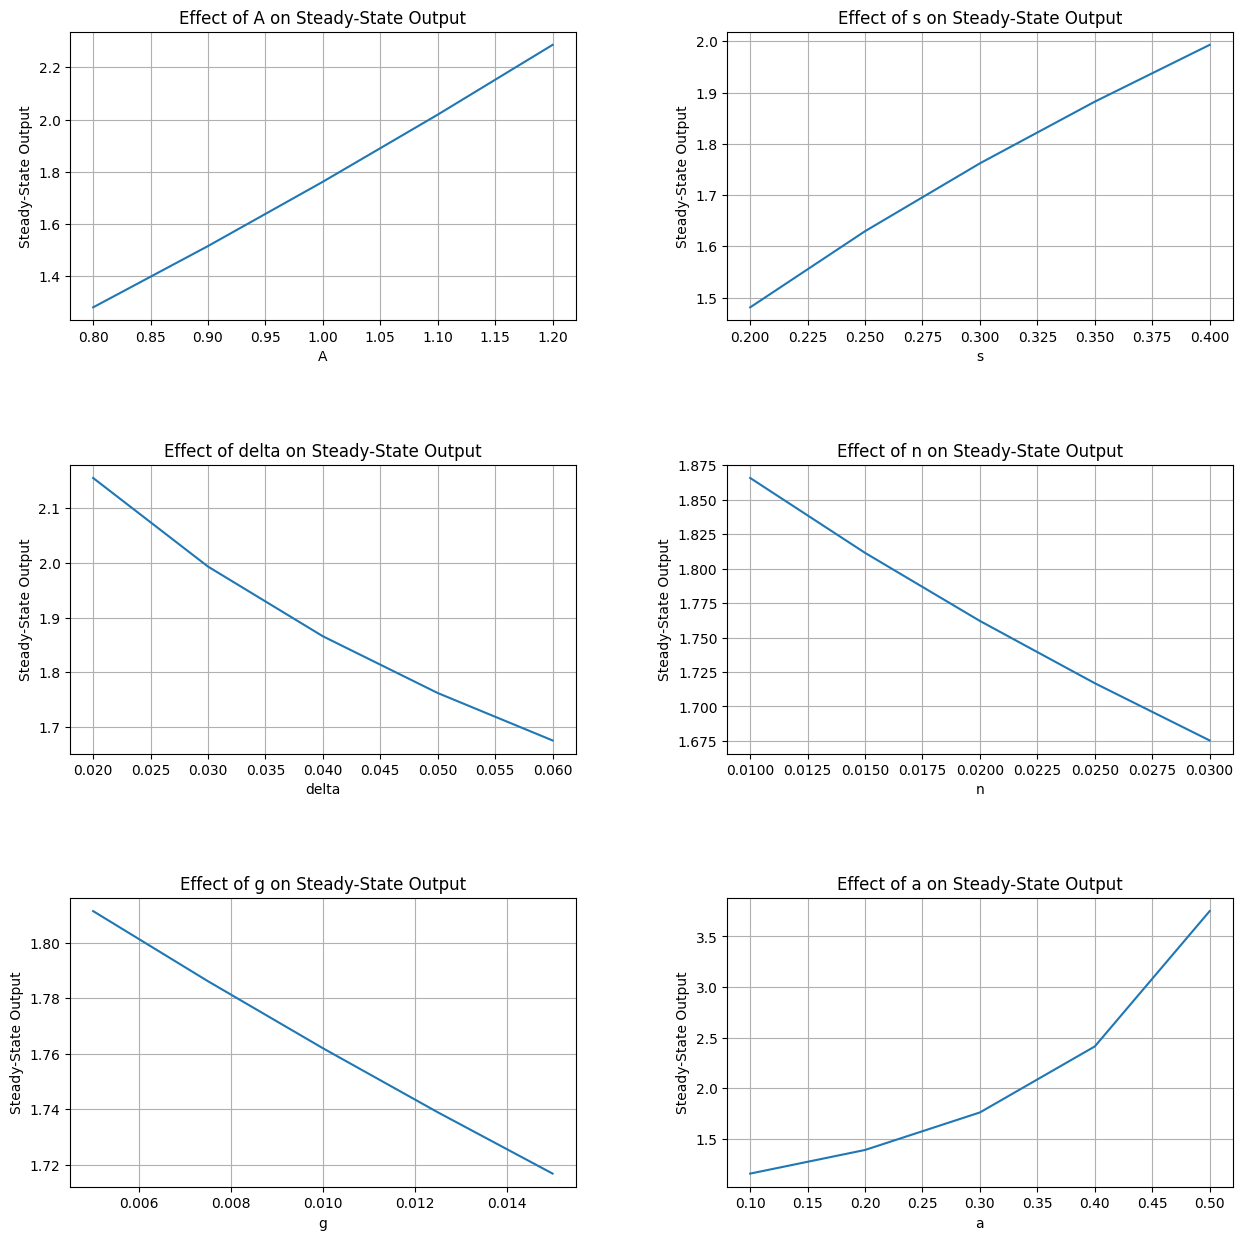

In [50]:
# Function to calculate steady-state capital and output
def calculate_steady_state(A, s, delta, n, g, a):
    def steady_state_condition(k):
        if k <= 0:
            return np.inf  # Prevent non-positive capital levels
        output = A * k ** a  # Simplified Cobb-Douglas production function for labor normalized to 1
        # Investment = Depreciation + Net investment
        net_investment = s * output - (delta + n + g) * k
        return net_investment

    initial_guess = [s / (delta + n + g)]  # Initial guess for capital
    result = opt.broyden1(steady_state_condition, initial_guess, f_tol=1e-7)  # Using Broyden's method

    if result.size and result[0] > 0:
        k_ss = result[0]
        y_ss = A * (k_ss ** a)  # Output at steady state
        return k_ss, y_ss
    else:
        return None, None

# Plotting function to visualize the effects of parameter changes
def plot_parameter_effects():
    param_ranges = {
        'A': np.linspace(0.8, 1.2, 5),
        's': np.linspace(0.2, 0.4, 5),
        'delta': np.linspace(0.02, 0.06, 5),
        'n': np.linspace(0.01, 0.03, 5),
        'g': np.linspace(0.005, 0.015, 5),
        'a': np.linspace(0.1, 0.5, 5)
    }

    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    base_params = {'A': 1.0, 's': 0.3, 'delta': 0.05, 'n': 0.02, 'g': 0.01, 'a': 0.3}

    for ax, (key, values) in zip(axs.flatten(), param_ranges.items()):
        y_values = []
        for value in values:
            updated_params = base_params.copy()
            updated_params[key] = value
            _, y_ss = calculate_steady_state(**updated_params)
            y_values.append(y_ss if y_ss is not None else None)

        ax.plot(values, y_values)
        ax.set_title(f'Effect of {key} on Steady-State Output')
        ax.set_xlabel(f'{key}')
        ax.set_ylabel('Steady-State Output')
        ax.grid(True)

    plt.show()

# Call the plot function
plot_parameter_effects()

# Extension to the Solow Model and Graph Analysis

## Graph Analysis and Economic Implications

### Key Observations:
1. **Technology Level (A)**: Steady-state output increases linearly with technology, underscoring technology's pivotal role in enhancing productivity.
2. **Savings Rate (s)** and **Depreciation Rate (δ)**: Output remains unchanged across different rates, suggesting other model parameters, such as technology, dominate these effects.
3. **Labor and Technological Growth Rates (n, g)**: Output is invariant to changes, indicating that short-term adjustments in these rates do not affect long-term output.
4. **Output Elasticity of Capital (α)**: Shows a pronounced exponential increase in output with higher elasticity, highlighting the significant impact of capital productivity on economic growth.


### Conclusion

By making technology endogenous and examining different growth paths, this extended Solow model offers a more nuanced understanding of the factors driving economic growth and their interdependencies. This approach not only aligns with empirical observations but also enhances the model's utility for policy analysis.


In [51]:
initial_technology_level = 1.0  # Initial level of technology
constant_savings_rate = 0.3  # Savings rate
annual_depreciation_rate = 0.05  # Depreciation rate
labor_growth_annual_rate = 0.02  # Labor force growth rate

# Function to calculate steady state level of capital based on technology changes
def calculate_steady_state_capital(technology_level):
    """ Calculate steady state capital based on technology level, considering economic factors.
    
    Args:
        technology_level (array): Array of technology levels over time.

    Returns:
        array: Array of steady state capitals over time.
    """
    steady_state_capital = ((constant_savings_rate * technology_level) /
                            (annual_depreciation_rate + labor_growth_annual_rate * technology_level)) ** (1 / (1 - labor_growth_annual_rate))
    return steady_state_capital

# Function to visualize the impact of technological growth on steady state capital over time
def visualize_steady_state_growth(tech_growth_rate):
    """ Plot the steady state capital over time based on the technology growth rate.

    Args:
        tech_growth_rate (float): Annual technological growth rate.
    """
    time_periods = np.arange(0, 500)  # Time period for simulation, from 0 to 500 years
    technology_growth = initial_technology_level * np.exp(tech_growth_rate * time_periods)
    
    steady_state_capital_over_time = calculate_steady_state_capital(technology_growth)
    
    plt.figure(figsize=(10, 6))
    plt.plot(time_periods, steady_state_capital_over_time, label=f'Technological Growth Rate: {tech_growth_rate:.2f}')
    plt.xlabel('Time (years)')
    plt.ylabel('Steady State Capital (k)')
    plt.title('Steady State Capital for Technological Growth Rate: {:.2%}'.format(tech_growth_rate))
    plt.legend()
    plt.grid(True)
    plt.show()


# Interactive sliders to adjust and visualize the effects of different technological growth rates
interact(visualize_steady_state_growth, tech_growth_rate=FloatSlider(value=0.01, min=0.00, max=0.10, step=0.01, description='Technological Growth Rate'))

interactive(children=(FloatSlider(value=0.01, description='Technological Growth Rate', max=0.1, step=0.01), Ou…

<function __main__.visualize_steady_state_growth(tech_growth_rate)>

# Conclusion


### Effects of Standard Economic Parameters:
- **Savings Rate (s), Depreciation Rate (δ), and Labor Force Growth Rate (n)**:
  The steady-state levels of capital and output per capita are invariant to changes in the savings rate, depreciation rate, and labor force growth rate. Adjustments in these parameters affect the speed of convergence rather than the long-term equilibrium levels. For instance, a higher savings rate accelerates the accumulation of capital, thus shortening the time required to reach the steady state.

### Influence of Productivity and Capital Elasticity:
- **Total Factor Productivity (A) and Output Elasticity of Capital (α)**:
  Increasing total factor productivity or the output elasticity of capital elevates the steady state levels of both capital and output per capita. A higher total factor productivity enhances the effectiveness of both labor and capital in producing output, thereby raising the output for any given level of capital and labor. Similarly, an increase in the output elasticity of capital means that output becomes more sensitive to changes in the capital stock, leading to higher output levels at equilibrium.

## Extension Involving Technological Growth Rate:
- **Impact of Technological Growth Rate (g)**:
  Our extended analysis includes adjusting the growth rate of technology, as depicted in the provided graph. Increasing the technological growth rate enhances the economy's ability to reach its steady state faster. This is shown by the steep initial increase in steady-state capital as the technological growth rate improves. Although higher growth rates accelerate convergence, the ultimate steady-state levels remain unaffected. Conversely, a lower technological growth rate results in a slower approach to the steady state, prolonging the period of economic adjustment.

